<a href="https://colab.research.google.com/github/FranciscaAlliende/APS-Failure-at-Scania-Trucks/blob/master/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# setup
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
# my libraries
import basic_prepro as bp
import null_values as nv
import unbalanced_classes as uc
import dim_reduction as dr
import evaluation_metrics as em

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_training_set.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_test_set.csv')

In [ ]:
# basic prepocessing
train = bp.data_prepro(train)
test = bp.data_prepro(test)

In [6]:
# null values
[y_train, X_train, y_test, X_test] = nv.null_values(train, test, t=0.5)

In [7]:
# downsampling
[y_down_train, X_down_train] = uc.downsampling(y_train, X_train)

In [8]:
# upsampling
[y_up_train, X_up_train] = uc.mySMOTE(y_train, X_train, 100)

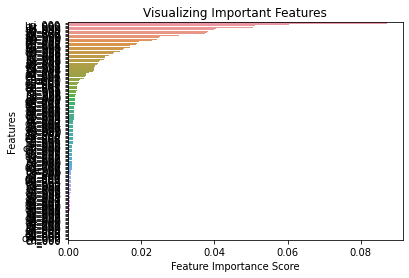

N selected features: 14


In [9]:
# dimensionality reduction RF + downsampling
[X_train_down_RF, X_test_down_RF] = dr.RF(X_down_train, y_down_train, X_test, n_estimators=100, g=0.02)

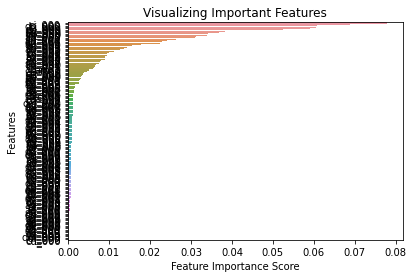

N selected features: 18


In [10]:
# dimensionality reduction RF + upsampling
[X_train_up_RF, X_test_up_RF] = dr.RF(X_up_train, y_up_train, X_test, n_estimators=100, g=0.015)

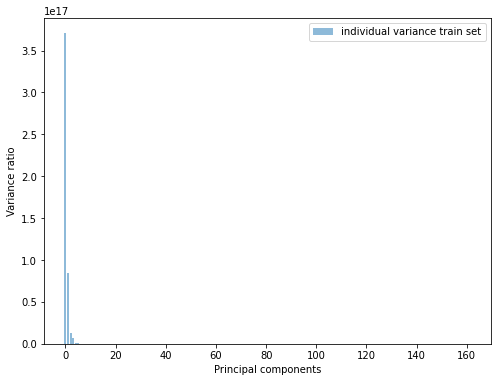

In [11]:
# dimensionality reduction PCA + downsampling
[X_train_down_PCA, X_test_down_PCA] = dr.myPCA(X_down_train, X_test, 10)

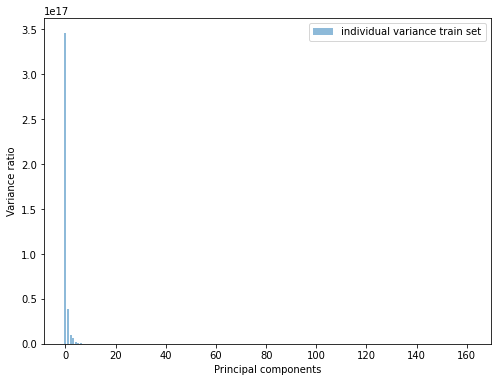

In [12]:
# dimensionality reduction PCA + upsampling
[X_train_up_PCA, X_test_up_PCA] = dr.myPCA(X_up_train, X_test, 10)

False positives:  842
False negatives:  21
Total cost: 18920
Confusion matrix, without normalization


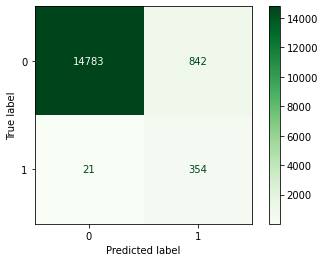

     Normalized confusion matrix


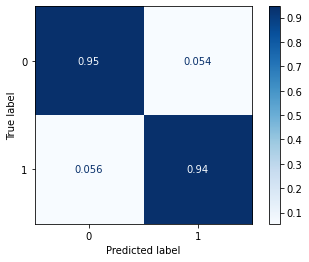

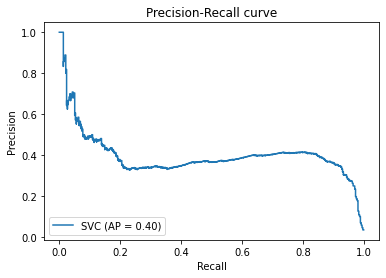

f1 score 0.451
precision:  0.296
recall 0.944


(18920, 0.45066836409929983, 0.2959866220735786, 0.944)

In [13]:
# Downsampling - RF - SVM
clf = svm.SVC()
clf.fit(X_train_down_RF, y_down_train)
y_pred = clf.predict(X_test_down_RF)

em.evaluation_metrics(y_pred, y_test, X_test_down_RF, clf, c1=10, c2=500)

False positives:  853
False negatives:  17
Total cost: 17030
Confusion matrix, without normalization


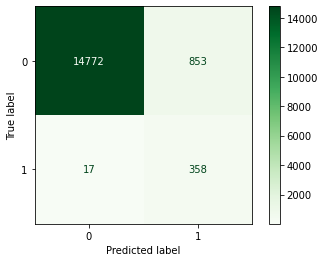

     Normalized confusion matrix


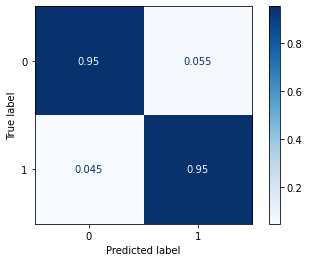

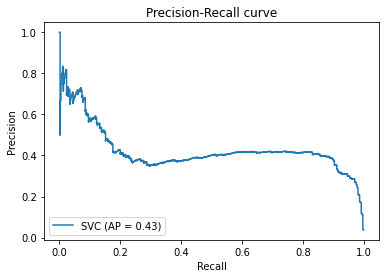

f1 score 0.451
precision:  0.296
recall 0.955


(17030, 0.45145018915510715, 0.29562345169281584, 0.9546666666666667)

In [14]:
# Upsampling - RF - SVM
clf = svm.SVC()
clf.fit(X_train_up_RF, y_up_train)
y_pred = clf.predict(X_test_up_RF)

em.evaluation_metrics(y_pred, y_test, X_test_up_RF, clf, c1=10, c2=500)

False positives:  588
False negatives:  34
Total cost: 22880
Confusion matrix, without normalization


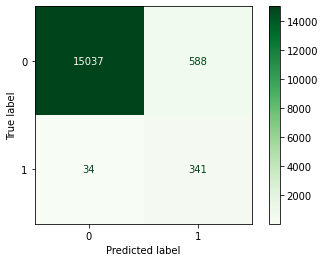

     Normalized confusion matrix


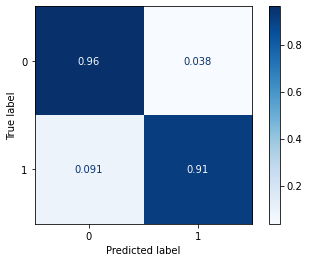

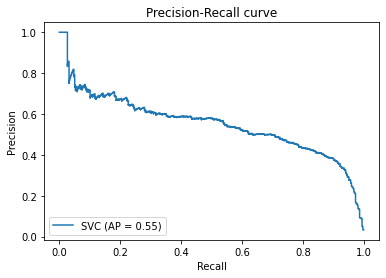

f1 score 0.523
precision:  0.367
recall 0.909


(22880, 0.5230061349693251, 0.36706135629709363, 0.9093333333333333)

In [15]:
# Downsampling - PCA - SVM
clf = svm.SVC()
clf.fit(X_train_down_PCA, y_down_train)
y_pred= clf.predict(X_test_down_PCA)

em.evaluation_metrics(y_pred, y_test, X_test_down_PCA, clf, c1=10, c2=500)

False positives:  761
False negatives:  24
Total cost: 19610
Confusion matrix, without normalization


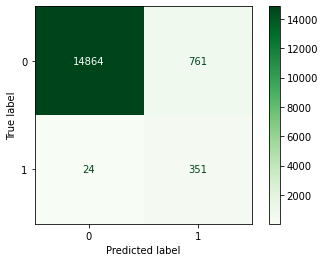

     Normalized confusion matrix


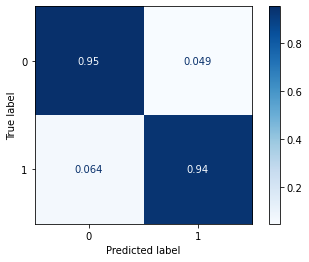

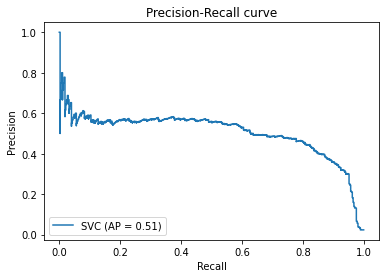

f1 score 0.472
precision:  0.316
recall 0.936


(19610, 0.4720914593140551, 0.31564748201438847, 0.936)

In [16]:
# Upsampling - PCA - SVM
clf = svm.SVC()
clf.fit(X_train_up_PCA, y_up_train)
y_pred = clf.predict(X_test_up_PCA)

em.evaluation_metrics(y_pred, y_test, X_test_up_PCA, clf, c1=10, c2=500)

False positives:  15282
False negatives:  0
Total cost: 152820
Confusion matrix, without normalization


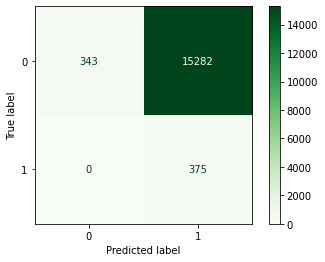

     Normalized confusion matrix


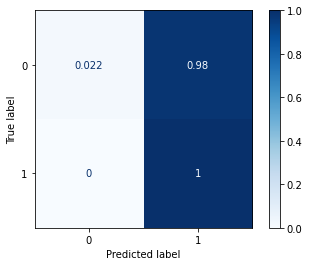

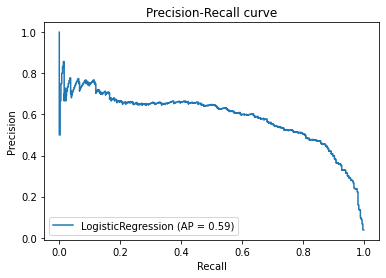

f1 score 0.047
precision:  0.024
recall 1.0


(152820, 0.04678143712574851, 0.02395094845755892, 1.0)

In [17]:
# Downsampling - RF - Logit
clf = LogisticRegression()
clf.fit(X_train_down_RF, y_down_train)
y_pred = clf.predict(X_test_down_RF)

em.evaluation_metrics(y_pred, y_test, X_test_down_RF, clf, c1=10, c2=500)

False positives:  10836
False negatives:  5
Total cost: 110860
Confusion matrix, without normalization


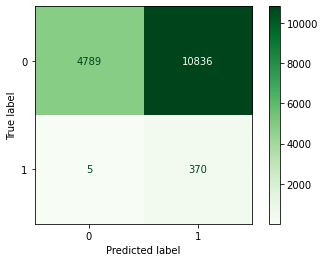

     Normalized confusion matrix


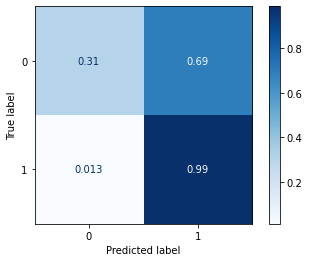

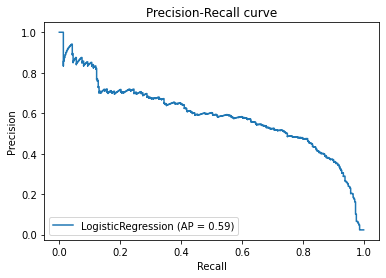

f1 score 0.064
precision:  0.033
recall 0.987


(110860, 0.06389776357827476, 0.033018026057469216, 0.9866666666666667)

In [18]:
# Upsampling - RF - Logit
clf = LogisticRegression()
clf.fit(X_train_up_RF, y_up_train)
y_pred = clf.predict(X_test_up_RF)

em.evaluation_metrics(y_pred, y_test, X_test_up_RF, clf, c1=10, c2=500)

False positives:  397
False negatives:  66
Total cost: 36970
Confusion matrix, without normalization


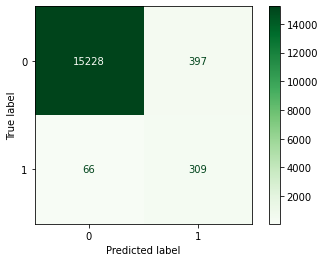

     Normalized confusion matrix


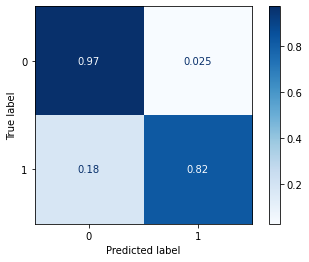

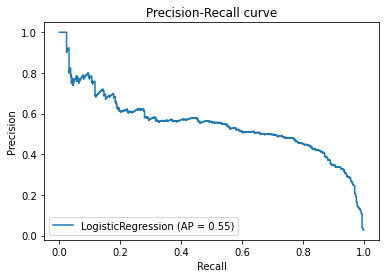

f1 score 0.572
precision:  0.438
recall 0.824


(36970, 0.5716928769657724, 0.4376770538243626, 0.824)

In [19]:
 # Downsampling - PCA - Logit
clf = LogisticRegression()
clf.fit(X_train_down_PCA, y_down_train)
y_pred = clf.predict(X_test_down_PCA)

em.evaluation_metrics(y_pred, y_test, X_test_down_PCA, clf, c1=10, c2=500)

False positives:  615
False negatives:  29
Total cost: 20650
Confusion matrix, without normalization


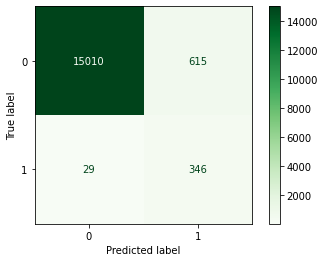

     Normalized confusion matrix


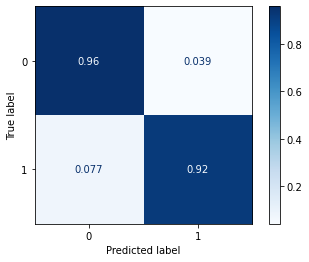

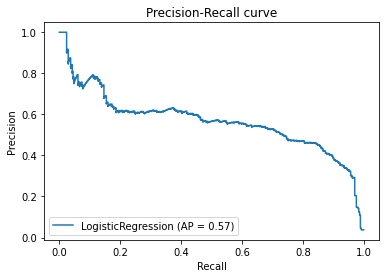

f1 score 0.518
precision:  0.36
recall 0.923


(20650, 0.5179640718562873, 0.3600416233090531, 0.9226666666666666)

In [20]:
 # Upsampling - PCA - Logit
clf = LogisticRegression()
clf.fit(X_train_up_PCA, y_up_train)
y_pred = clf.predict(X_test_up_PCA)

em.evaluation_metrics(y_pred, y_test, X_test_up_PCA, clf, c1=10, c2=500)